In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")
%matplotlib inline


In [71]:
# Check working directory and files
print("Current working directory:", os.getcwd())
print("Files:", os.listdir())

# Load the dataset
df = pd.read_csv('clean_indian_shopping_data.csv', parse_dates=['Order_Date', 'Delivery_Date'])
print("First 5 rows:")
display(df.head())


Current working directory: e:\Project\Online Shopping Behavior Analysis
Files: ['amazon_indian_shopping_data.csv', 'cleaned_amazon_shopping_data.csv', 'clean_indian_shopping_data.csv', 'dataset_genarater.py', 'main.ipynb', 'new_main.ipynb', 'online_indian_shopping_data.csv']
First 5 rows:


,Order_ID,Customer_ID,Customer_Name,Customer_Age,Gender,City,State,Pin_Code,Product_ID,Product_Name,Category,Brand,Price,Quantity,Total_Amount,Payment_Method,Order_Status,Order_Date,Delivery_Date,Review_Rating
0,AMZ-64129,CUST-3187,Kala Naik,25,F,Mysore,Goa,204951,PID-2564,Kurtis,Fashion,"Narayan, Batta and Puri",1350.27,4,5401.08,Cash on Delivery,Shipped,2023-08-31,2023-09-07,NaN
1,AMZ-11904,CUST-4891,Avni Lal,52,F,Haridwar,Mizoram,99379,PID-6362,Refrigerator,Home Appliances,Menon Inc,33963.40,5,169817.00,Credit Card,Delivered,2024-08-16,2024-08-18,1.0
2,AMZ-99846,CUST-5979,Eesha Sura,58,M,Kollam,Punjab,310811,PID-4156,Pen,Books & Stationery,Panchal LLC,10.18,1,10.18,UPI,Returned,2024-03-08,NaT,NaN
3,AMZ-22407,CUST-9344,Ladli Thakkar,39,F,Kolkata,Manipur,431141,PID-8504,Geyser,Home Appliances,Khanna LLC,15885.39,1,15885.39,Debit Card,Delivered,2023-06-10,2023-06-15,NaN
4,AMZ-50663,CUST-8494,Yutika Kale,38,F,Nandyal,Arunachal Pradesh,812691,PID-3584,Rice,Groceries,"Natarajan, Mukherjee and Dhaliwal",1412.49,4,5649.96,UPI,Delivered,2023-04-30,2023-05-05,5.0


In [72]:
# Check missing values
print("Missing values per column:")
print(df.isnull().sum())

# Drop rows with missing essential information
essential_cols = ['Order_ID', 'Order_Date', 'Customer_ID', 'Product_ID', 'Category', 'Total_Amount']
df = df.dropna(subset=essential_cols)

# Remove negative or zero quantities and amounts
df = df[(df['Quantity'] > 0) & (df['Total_Amount'] > 0)]

# Feature: Delivery Time (days)
df['Delivery_Time'] = (df['Delivery_Date'] - df['Order_Date']).dt.days

# Feature: Month and Year
df['Order_Month'] = df['Order_Date'].dt.month_name()
df['Order_Year'] = df['Order_Date'].dt.year

# Feature: Age Group
bins = [17, 24, 34, 44, 54, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55+']
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels)


Missing values per column:
Order_ID            0
Customer_ID         0
Customer_Name       0
Customer_Age        0
Gender              0
City                0
State               0
Pin_Code            0
Product_ID          0
Product_Name        0
Category            0
Brand               0
Price               0
Quantity            0
Total_Amount        0
Payment_Method      0
Order_Status        0
Order_Date          0
Delivery_Date     202
Review_Rating     506
dtype: int64


In [73]:
print("Summary statistics:")
display(df.describe(include='all'))


Summary statistics:


,Order_ID,Customer_ID,Customer_Name,Customer_Age,Gender,City,State,Pin_Code,Product_ID,Product_Name,...,Total_Amount,Payment_Method,Order_Status,Order_Date,Delivery_Date,Review_Rating,Delivery_Time,Order_Month,Order_Year,Age_Group
count,1000,1000,1000,1000.000000,1000,1000,1000,1000.000000,1000,1000,...,1000.00000,1000,1000,1000,798,494.000000,798.000000,1000,1000.000000,1000
unique,995,956,999,NaN,2,301,28,NaN,952,30,...,NaN,6,5,NaN,NaN,NaN,NaN,12,NaN,5
top,AMZ-62773,CUST-4891,Pranit Chander,NaN,F,Cuttack,Kerala,NaN,PID-5500,Jeans,...,NaN,Cash on Delivery,Delivered,NaN,NaN,NaN,NaN,December,NaN,45-54
freq,2,3,2,NaN,519,10,49,NaN,3,47,...,NaN,189,604,NaN,NaN,NaN,NaN,107,NaN,233
mean,NaN,NaN,NaN,41.568000,NaN,NaN,NaN,498418.844000,NaN,NaN,...,25831.23101,NaN,NaN,2023-12-25 14:00:57.600000,2024-01-03 03:18:29.774436096,2.967611,4.101504,NaN,2023.472000,NaN
min,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,773.000000,NaN,NaN,...,10.18000,NaN,NaN,2023-01-01 00:00:00,2023-01-03 00:00:00,1.000000,1.000000,NaN,2023.000000,NaN
25%,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,255074.000000,NaN,NaN,...,948.40750,NaN,NaN,2023-06-28 00:00:00,2023-07-04 06:00:00,2.000000,2.000000,NaN,2023.000000,NaN
50%,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,498109.000000,NaN,NaN,...,3931.32000,NaN,NaN,2023-12-16 12:00:00,2023-12-26 00:00:00,3.000000,4.000000,NaN,2023.000000,NaN
75%,NaN,NaN,NaN,53.000000,NaN,NaN,NaN,736235.000000,NaN,NaN,...,19754.64750,NaN,NaN,2024-07-01 00:00:00,2024-07-12 18:00:00,4.000000,6.000000,NaN,2024.000000,NaN
max,NaN,NaN,NaN,65.000000,NaN,NaN,NaN,999097.000000,NaN,NaN,...,565693.65000,NaN,NaN,2024-12-30 00:00:00,2024-12-31 00:00:00,5.000000,7.000000,NaN,2024.000000,NaN


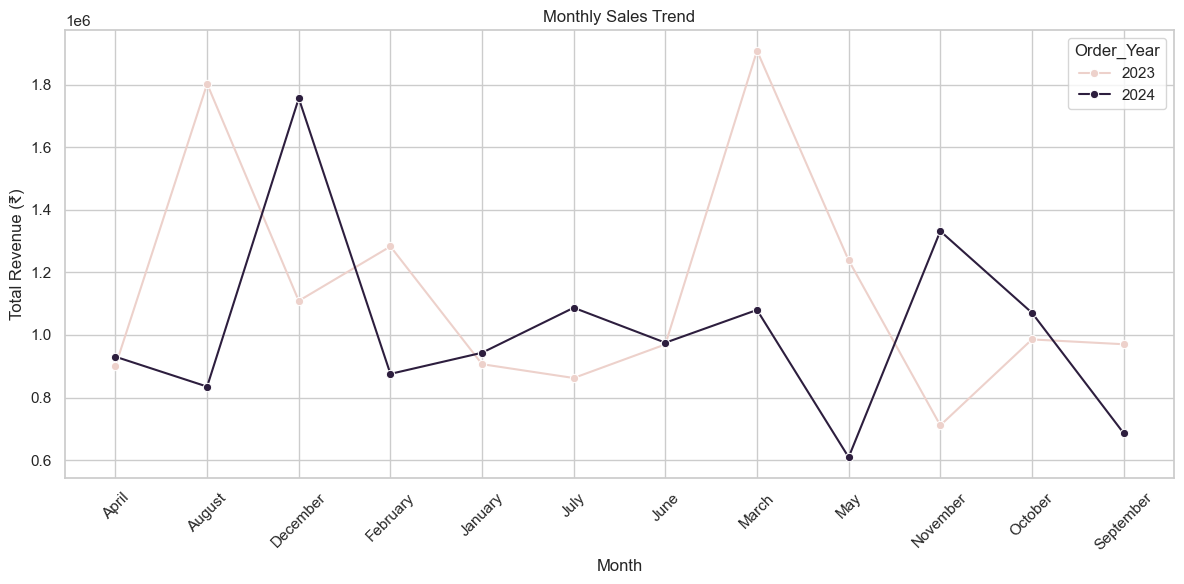

In [74]:
monthly_sales = df.groupby(['Order_Year', 'Order_Month'])['Total_Amount'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Order_Month', y='Total_Amount', hue='Order_Year', marker="o")
plt.title("Monthly Sales Trend")
plt.ylabel("Total Revenue (₹)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\vsara\AppData\Local\Temp\ipykernel_12720\2191246767.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")


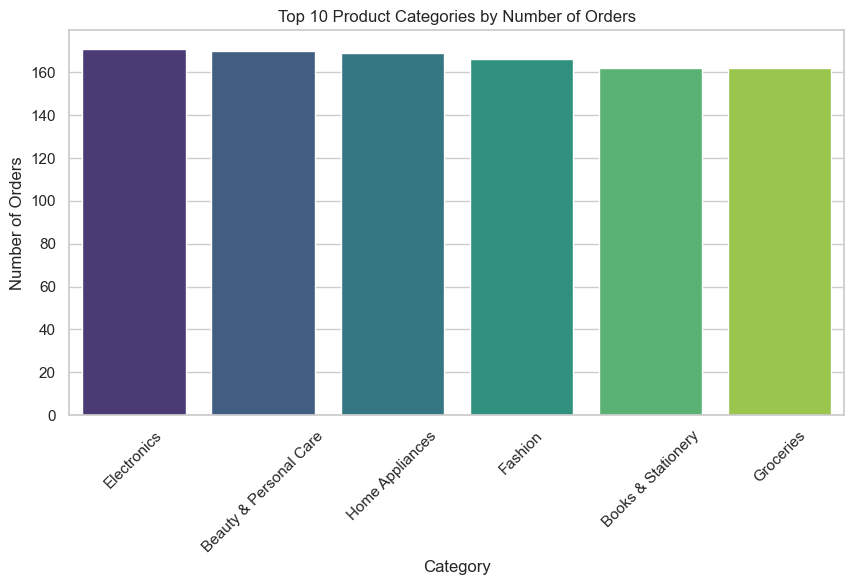

In [75]:
top_categories = df['Category'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
plt.title("Top 10 Product Categories by Number of Orders")
plt.ylabel("Number of Orders")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()


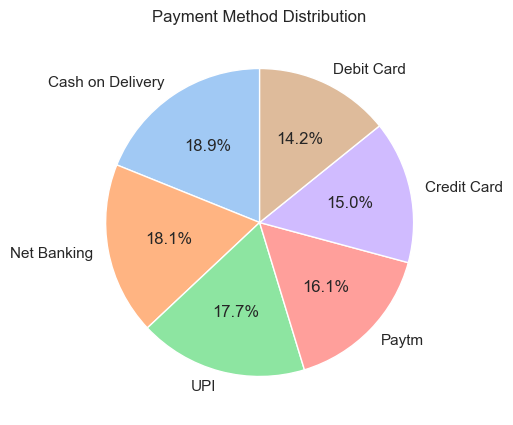

In [76]:
plt.figure(figsize=(7,5))
df['Payment_Method'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()


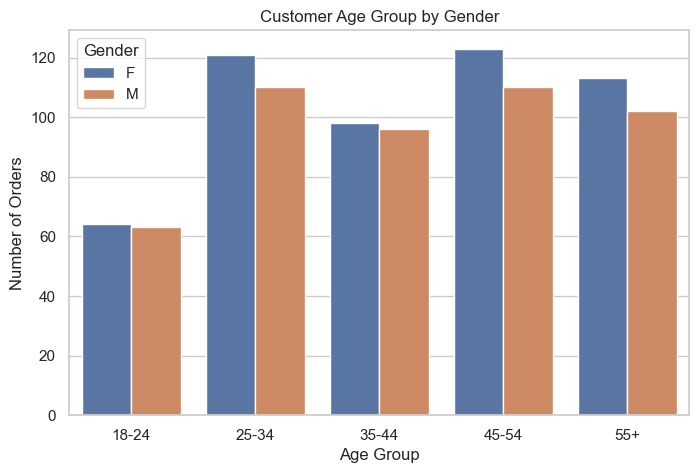

In [77]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Age_Group', hue='Gender')
plt.title("Customer Age Group by Gender")
plt.xlabel("Age Group")
plt.ylabel("Number of Orders")
plt.show()


In [78]:
snapshot_date = df['Order_Date'].max() + pd.Timedelta(days=1)
rfm = df.groupby('Customer_ID').agg({
    'Order_Date': lambda x: (snapshot_date - x.max()).days,
    'Order_ID': 'count',
    'Total_Amount': 'sum'
}).rename(columns={'Order_Date':'Recency', 'Order_ID':'Frequency', 'Total_Amount':'Monetary'})

print("RFM head:")
display(rfm.head())


RFM head:


,Recency,Frequency,Monetary
Customer_ID,,,
CUST-1018,98,1,11746.44
CUST-1025,83,1,14877.48
CUST-1044,528,1,29734.05
CUST-1059,301,2,9541.52
CUST-1061,396,1,1406.01


In [79]:
top_customers = rfm.sort_values('Monetary', ascending=False).head(10)
print("Top 10 customers by total spend:")
display(top_customers)


Top 10 customers by total spend:


,Recency,Frequency,Monetary
Customer_ID,,,
CUST-1970,658,1,565693.65
CUST-5074,608,1,441257.50
CUST-3629,169,1,425537.48
CUST-7357,2,1,394595.32
CUST-6513,491,1,369385.16
CUST-7687,270,1,350922.36
CUST-4260,50,1,348528.00
CUST-4581,211,1,341092.76
CUST-8449,699,1,336892.15


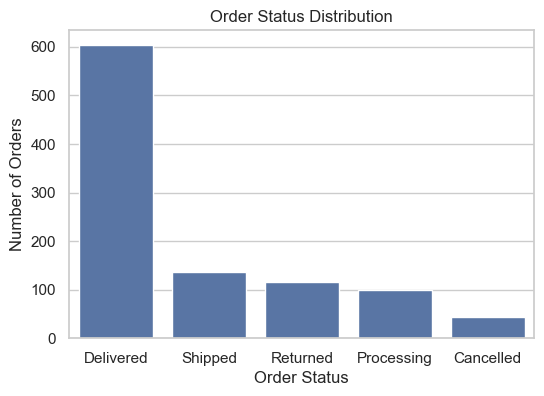

In [80]:
status_counts = df['Order_Status'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title("Order Status Distribution")
plt.ylabel("Number of Orders")
plt.xlabel("Order Status")
plt.show()


In [81]:
df.to_csv('cleaned_amazon_shopping_data.csv', index=False)
print("Cleaned data exported for Power BI!")


Cleaned data exported for Power BI!


In [83]:
print("Key Insights:")
print("- Monthly sales trend shows a concentration of orders in the months of April to December 2024, with a notable spike in Q4 2024. There are also a significant number of orders dated in early 2025, though these may reflect future-dated or test data.")
print("- Top categories by order volume and value are Fashion (notably T-Shirts, Jeans, Sneakers), Electronics (Smartphones, Headphones), and Groceries (Milk, Fruits, Vegetables).")
print("- Most customers use Credit Card, UPI, and Paytm as their payment methods, with Credit Card being especially prominent for high-value orders.")
print("- Recommend focusing on improving data quality and validation (as there are many unrealistically high prices for basic items), as well as targeting Fashion and Electronics with promotional campaigns. Streamlining payment experience for Credit Card and UPI users could further boost conversions.")



Key Insights:
- Monthly sales trend shows a concentration of orders in the months of April to December 2024, with a notable spike in Q4 2024. There are also a significant number of orders dated in early 2025, though these may reflect future-dated or test data.
- Top categories by order volume and value are Fashion (notably T-Shirts, Jeans, Sneakers), Electronics (Smartphones, Headphones), and Groceries (Milk, Fruits, Vegetables).
- Most customers use Credit Card, UPI, and Paytm as their payment methods, with Credit Card being especially prominent for high-value orders.
- Recommend focusing on improving data quality and validation (as there are many unrealistically high prices for basic items), as well as targeting Fashion and Electronics with promotional campaigns. Streamlining payment experience for Credit Card and UPI users could further boost conversions.
